# Creación de animaciones en Jupyter Notebooks

**Objetivo general**. 

Mostrar ejemplos sencillos y llamativos de gráficos animados con un enfoque científico e ingenieril.

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/Curso_Macti/tree/main/03_Cuadernos_Interactivos/Animaciones">Animaciones</a>, Diseño de cursos interactivos con la plataforma Macti by Eduardo Beltrán y <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

<a name='1'></a>
## Animaciones en 1D

Se describirá el procedimiento para generar animaciones en una dimensión. Ya sea en coordenadas cartesianas o polares.

<a name='1-1'></a>
### ¿Cómo se generan estas animaciones? 
Primero se importan los módulos y bibliotecas necesarias. Posteriormente se definen las dimensiones del gráfico y por medio de funciones auxiliares se logra el gráfico animado. La animación se puede mostrar como un elemento HTML dentro del Jupyter Notebook.

<img src="./fig_1.PNG" width="800px" />

<a name='1-2'></a>
### Animaciones para coordenadas cartesianas - Función `np.sin()`

Se generará una animación con el uso de la función `np.sin()` y se propondrán parámetros que modifiquen el comportamiento del gráfico.

In [8]:
# 1- importamos las bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

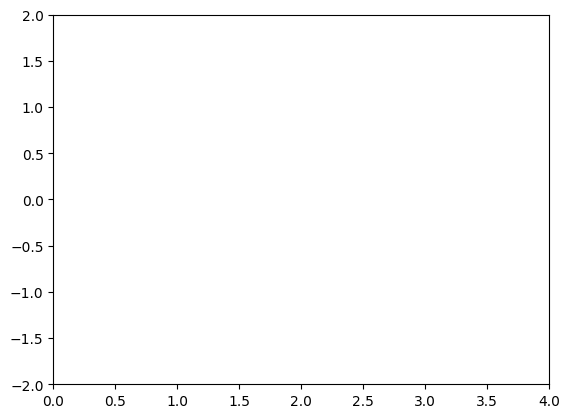

In [9]:
# 2 - tamaño del gráfico
fig, ax = plt.subplots()
ax.set_xlim(( 0, 4))
ax.set_ylim((-2, 2))
line, = ax.plot([], [], 'r-', lw=4)

In [3]:
# 3- funciones de inicio / actualización

def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    x = np.linspace(0, 4, 1000)
    y = i*0.01*np.sin(np.pi*x)
    line.set_data(x, y)
    return (line,)

In [7]:
# 4- animación final
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=30, 
                               blit=True)
anim.save('animation.gif', writer="pillow", fps=60) # se puede salvar la animación en un GIF
HTML(anim.to_jshtml())

KeyError: 'MPEG'

<a name='1-3'></a>
### Animaciones para coordenadas polares - Rosa Polar

Mediante algunas funciones matemáticas se generarán los pétalos de una rosa.

In [ ]:
# 2 - tamaño del gráfico
fig2, ax2 = plt.subplots(subplot_kw={'projection': 'polar'})
ax2.set_rlim(0,4)
rosa, = ax2.plot([], [], 'y-', lw=2)

In [ ]:
# 3- funciones de inicio / actualización
def initRosa():
    rosa.set_data([], [])
    return (rosa,)


def animateRosa(i):
    petalos = 5
    theta = np.linspace(0, 2*np.pi, 500)
    r = (i*0.1)* np.sin(petalos * theta)
    rosa.set_data(theta, r)
    return (rosa,)

In [ ]:
# 4- animación final
animRosa = animation.FuncAnimation(fig2, animateRosa, init_func=initRosa,
                               frames=40, interval=100, 
                               blit=True)
#animRosa.save('animation2.gif', writer="pillow", fps=60)
HTML(animRosa.to_jshtml())

<a name='1-4'></a>
### Uso de SciPy en animaciones - Interpolador Cúbico

Haciendo uso de la biblioteca SciPy se emulará el movimiento de una serpiente.

In [ ]:
#1 - importar bibliotecas
from scipy.interpolate import interp1d
import random

In [ ]:
# 2 - tamaño del gráfico
fig3, ax3 = plt.subplots()
ax3.set_xlim(( 0, 20))
ax3.set_ylim(( -10, 10))
snake, = ax3.plot([], [], 'bo-', lw=2, markerfacecolor='red')

In [ ]:
# 3- funciones de inicio / actualización

def initSnake():
    snake.set_data([], [])
    return (snake,)

xn = []
yn = []

def animateSnake(i):
    xn.append(i)
    yn.append(round(random.uniform(-5, 5), 3))
    
    x = np.array(xn)
    y = np.array(yn)
    
    interpolar = False
    
    if(len(x) > 3 and interpolar):
        xnew = np.linspace(0, i, num=i*10, endpoint=True)
        f = interp1d(x, y)
        f2 = interp1d(x, y, kind='cubic')
        snake.set_data(xnew, f2(xnew))
        return (snake,)
    
    else :
        snake.set_data(xn, yn)
        return (snake,)

In [ ]:
# 4- animación final
animSnake = animation.FuncAnimation(fig3, animateSnake, init_func=initSnake,
                               frames=20, interval=1000, 
                               blit=True)
#anim.save('animation2.gif', writer="pillow", fps=60)
HTML(animSnake.to_jshtml())

<a name='2'></a>
## Animaciones en 2D

Este tipo de animaciones son ideales para representar procesos científicos y de ingeniería, debido a que son más visuales y llamativas. Para la elaboración de este tipo de animaciones se partirá de la metodología usada en la elaboración de animaciones 1D. Con ligeras variaciones, por ejemplo, el uso de mallas geométricas.

<a name='2-1'></a>
### La importancia de las mallas para animaciones 2D

Una malla geométrica 2D actua como el lienzo sobre el cual se puede plasmar el resultado de una simulación númerica, proceso de ML, inteligencia artificial, u otros.  

In [ ]:
# Generación de la malla rectangular
nodos_x, nodos_y = 20, 20
x = np.linspace(0, 100, nodos_x)
y = np.linspace(0, 100, nodos_y)
xg, yg = np.meshgrid(x, y)

plt.plot(xg, yg, '-', c='gray') # líneas verticales
plt.plot(xg.transpose(), yg.transpose(), '-', c='gray') # líneas horizontales
plt.show()

In [ ]:
# 2 - tamaño del gráfico
fig4, ax4 = plt.subplots(figsize=(6,6))

In [ ]:
# 3 - función de animación
def animate2D(i):
    ax4.clear()
    propiedad = np.random.normal(100, 25, size=(nodos_x, nodos_y))
    colorPlot = ax4.contourf(xg, yg, propiedad, alpha=.85, cmap='plasma')
    C = ax4.contour(xg, yg, propiedad, 10, colors='white', linewidths =0.5)
    #ax4.clabel(C, inline=1, fontsize=6)
    return (colorPlot)

In [ ]:
#4 - correr animación
anim2D = animation.FuncAnimation(fig4, animate2D, interval=200, frames=25)
HTML(anim2D.to_jshtml())

<a name='2-2'></a>
### Animaciones 2D con pcolormesh

La función `pcolormesh()`, a diferencia de `contourf()`, nos permite un mayor control de los elementos gráficos auxiliares, tales como leyendas, etiquetas, títulos, paleta de colores, etc.

In [ ]:
# 1- definir malla
nodos = 50
xy = np.linspace(-3, 3, nodos)
xg, yg = np.meshgrid(xy, xy)
prop = np.ones((nodos, nodos)) 

# 2 - definir tamaño del grafico
fig5 = plt.figure(figsize=(6,6))
ax5 = plt.axes(xlim=(-3, 3), ylim=(-3, 3))
cax = ax5.pcolormesh(xg, yg, prop, cmap='cividis',vmin=-1, vmax=1, shading='auto')
fig5.colorbar(cax)

In [ ]:
def funcion2D(x,y,t):
    A = np.sin(2 * np.pi * t / 25)
#    return A * (x**2 + y**2)
#    return A * np.sin(x**2 + y**2)
    return A * np.sin(x) * np.cos(y)

In [ ]:
def animate2D(i, x, y):
    z = funcion2D(x,y,i)
    cax.set_array(z.flatten())
    return (cax)

anim = animation.FuncAnimation(fig5, animate2D, fargs=(xg, yg), interval=100, frames=25)
HTML(anim.to_jshtml())

### Generación de animaciones con ayuda de PANDAS

Generar una animacion 2D a partir de los datos de simulación matematica de yacimientos almacenados en el archivo `oil_flow.csv`. 

In [ ]:
import pandas as pd
df = pd.read_csv('./oil_flow.csv')

In [ ]:
nxGrid = 21
nyGrid = 21
datax, datay= np.array(df.iloc[:,0]), np.array(df.iloc[:,1])
gridx, gridy = (datax.reshape(nxGrid, nyGrid)), (datay.reshape(nxGrid, nyGrid))

def getSwFromDataframe(i):
    column = i + 2
    dataSw = np.array(df.iloc[:, column])
    sw = (dataSw.reshape(nxGrid, nyGrid))
    return sw

sw = getSwFromDataframe(0)

fig6 = plt.figure(figsize=(6,6))
ax6 = plt.axes(xlim=(0, 1000), ylim=(150, 900))
cax2 = ax6.pcolormesh(gridx, gridy, sw, cmap='viridis',vmin=0.21, vmax=0.79, shading='gouraud')
fig6.colorbar(cax2)

In [ ]:
def animate2D(i):
    sw = getSwFromDataframe(i)
    cax2.set_array(sw.flatten())
    return (cax2)

anim = animation.FuncAnimation(fig6, animate2D, interval=300, frames=40)
HTML(anim.to_jshtml())